# Plataforma de trabajo: Google Colaboratory

# Datalake: Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
metdat_sitios_fl = pd.read_csv('/content/drive/MyDrive/Otros/googlemaps_metadata_sitios_florida.csv')

In [ ]:
pd.options.display.max_columns = None
metdat_sitios_fl.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,MISC,state,ATM,Attorney,Auto repair shop,Bank,Barber shop,Beauty salon,Cell phone store,Church,Clothing store,Condominium complex,Convenience store,Dentist,Doctor,Gas station,Gift shop,Hair salon,Insurance agency,Massage therapist,Nail salon,Park,Real estate agency,Restaurant,Tire shop,Used car dealer,Amenities_Bar on site,Amenities_Bar onsite,Amenities_Gender-neutral restroom,Amenities_Gender-neutral toilets,Amenities_Good for kids,Amenities_High chairs,Amenities_Mechanic,Amenities_Public restroom,Amenities_Public toilet,Amenities_Restroom,Amenities_Toilets,Amenities_Wi-Fi,Checks,Credit cards,Curbside pickup,Debit cards,Delivery,Dine-in,Drive-through,Gender-neutral restroom,Gender-neutral toilets,Good for kids,High chairs,In-store pickup,In-store shopping,Mechanic,NFC mobile payments,No-contact delivery,Online appointments,Onsite services,Payments_Cash only,Payments_Cash-only,Payments_Checks,Payments_Cheques,Payments_Credit cards,Payments_Debit cards,Payments_NFC mobile payments,Public restroom,Public toilet,Restroom,Same-day delivery,Service options_Curbside pickup,Service options_Delivery,Service options_Dine-in,Service options_Drive-through,Service options_In-store pick-up,Service options_In-store pickup,Service options_In-store shopping,Service options_Language assistance,Service options_No-contact delivery,Service options_Online appointments,Service options_Online care,Service options_Onsite services,Service options_Outdoor seating,Service options_Outdoor services,Service options_Same-day delivery,Service options_Takeaway,Service options_Takeout,Takeaway,Takeout,Toilets,Wi-Fi,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday
0,First Impressions Barbershop Inc.,"First Impressions Barbershop Inc., 577 Deltona...",0x88e711bd2244fe3b:0x8406dd780f0574d1,NaN,28.877581,-81.281276,Barber shop,4.0,8,NaN,NaN,Open ⋅ Closes 8PM,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8AM–8PM,8AM–8PM,8AM–8PM,8AM–8PM,8AM–8PM,8AM–8PM,8AM–8PM
1,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,NaN,26.641377,-81.940545,Restaurant,5.0,1,$$,"Amenities_Good for kids, Service options_Dine-...",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cutting Point,"Cutting Point, 1095 E 9 Mile Rd #5, Pensacola,...",0x88909517e0c1c69b:0xeaa131bf8f6f1251,NaN,30.531940,-87.242073,Hair salon,4.7,65,NaN,"Payments_Checks, Debit cards, Amenities_Restroom",Open ⋅ Closes 6PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9AM–6PM,9AM–6PM,9AM–2:30PM,Closed,9AM–6PM,9AM–6PM,9AM–6PM


In [ ]:
metdat_sitios_fl.shape

(30582, 105)

In [ ]:
metdat_sitios_fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 105 entries, name to Wednesday
dtypes: float64(3), int64(87), object(15)
memory usage: 41.1+ KB


# 1. Top 24 Categorias Google Maps business en Florida

In [2]:
import pandas as pd

df_metada = pd.read_csv('/content/drive/MyDrive/Otros/googlemaps_metadata_sitios.csv')

# FILTRAMOS PARA FLORIDA

metdat_florida = df_metada[df_metada['address'].str.contains('FL', na=False, case=True)]
metdat_florida = metdat_florida.copy()
metdat_florida.head(3)

# Le damos el formato adecuado a la columna category:

import numpy as np
import ast

metdat_florida['category'] = metdat_florida['category'].apply(lambda x: ast.literal_eval(x)
                                                                if isinstance(x, str) else np.nan)

def format_category_list(category_list):
    if isinstance(category_list, list):
        return ', '.join(category_list)
    else:
        return category_list

metdat_florida['category'] = metdat_florida['category'].apply(format_category_list)
# Realizamos un conteo del top 24 de categorias:

category = metdat_florida['category'].str.split(', ').explode()
category_counts = category.value_counts()/len(metdat_florida)

# Mostrar el conteo de 24 categorías mas importantes
category_counts.head(24)

Restaurant             0.031109
Auto repair shop       0.022180
Beauty salon           0.021934
Convenience store      0.019673
Hair salon             0.019270
Doctor                 0.018496
Gas station            0.018163
Nail salon             0.016856
ATM                    0.015197
Church                 0.014901
Barber shop            0.013692
Dentist                0.013062
Clothing store         0.012102
Insurance agency       0.012047
Real estate agency     0.011843
Cell phone store       0.011667
Condominium complex    0.010810
Park                   0.010281
Massage therapist      0.010054
Attorney               0.009327
Bank                   0.009169
Tire shop              0.008831
Used car dealer        0.008303
Gift shop              0.008275
Name: category, dtype: float64

# 2. Descripcion algunas variables numericas

In [ ]:
metdat_sitios_fl[['avg_rating','num_of_reviews']].describe()

,avg_rating,num_of_reviews
count,30582.000000,30582.000000
mean,4.324112,34.533484
std,0.715633,58.212038
min,1.000000,1.000000
25%,4.000000,7.000000
50%,4.500000,18.000000
75%,4.800000,38.000000
max,5.000000,1426.000000


# 3. Rating vs Reviews: La mayoria de reviews son de 3.5 a 5 estrellas. Lo que da a entender opiniones variadas acerca de los negocios por parte de los clientes.

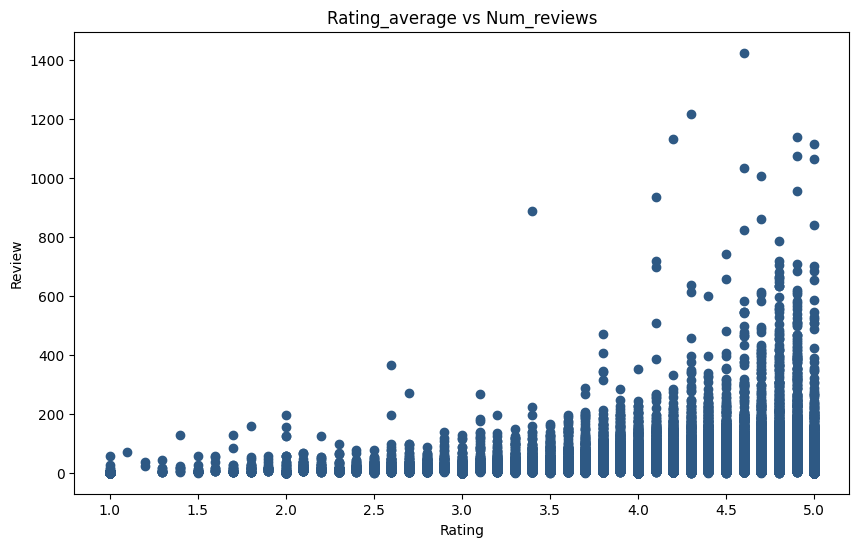

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(metdat_sitios_fl['avg_rating'], metdat_sitios_fl['num_of_reviews'], color='#2E5984') #, width=0.25
#sns.violinplot(x=metdat_sitios_fl['stars'], y=metdat_sitios_fl['review_count'], inner="quartile", palette="pastel")
plt.title('Rating_average vs Num_reviews')
plt.xlabel('Rating')
plt.ylabel('Review')
#plt.grid(True)
plt.show()

# 4. Numero de negocios (categoria) de la muestra de google maps en Florida.

In [ ]:
columns_to_count = ['category']

for column in columns_to_count:
    counts = metdat_sitios_fl[column].value_counts()
    print(f"Counts for column '{column}':")
    print(counts)

Counts for column 'category':
Restaurant             2909
Church                 2270
Nail salon             2095
Barber shop            2090
Condominium complex    2071
Auto repair shop       2057
Doctor                 1885
Beauty salon           1696
Gas station            1573
Park                   1557
Real estate agency     1456
Hair salon             1343
Dentist                1127
Used car dealer         938
Convenience store       910
Attorney                852
Insurance agency        753
Clothing store          613
Tire shop               502
Massage therapist       479
Cell phone store        473
ATM                     439
Gift shop               348
Bank                    146
Name: category, dtype: int64


# 5. Rating por categorias: La mayoria de negocios reciben un rating de 3.5 a 5 strellas. Podria decirse que el nivel de satisfaccion de los clientes es alto hablando de forma general.

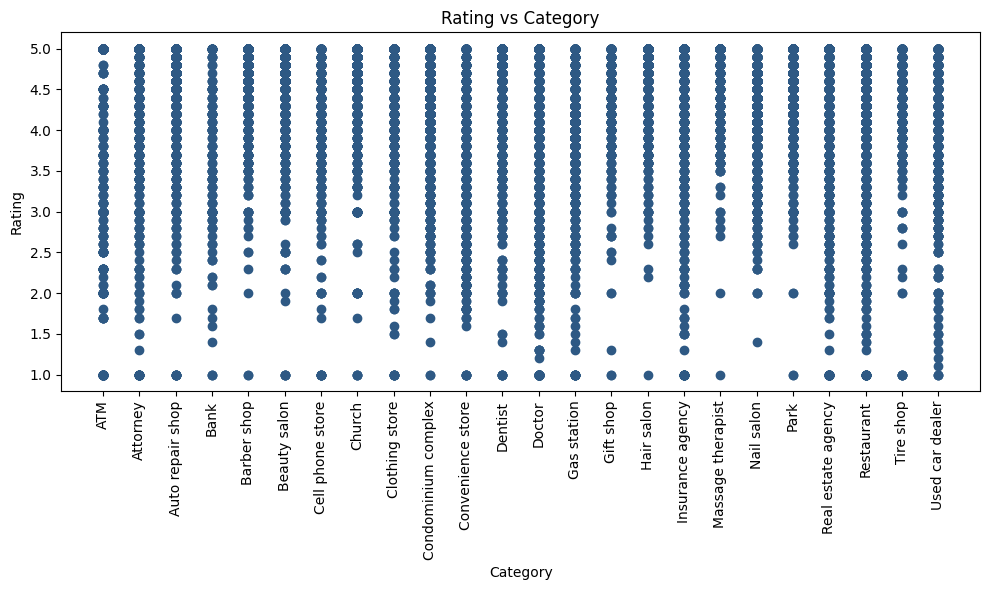

In [ ]:
metdat_sitios_fl_sorted = metdat_sitios_fl.sort_values(by='category')

plt.figure(figsize=(10, 6))
plt.scatter(metdat_sitios_fl_sorted['category'], metdat_sitios_fl_sorted['avg_rating'], color='#2E5984')
plt.title('Rating vs Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout for better readability
plt.show()

# 6. Presencia de outliers en rating y reviews

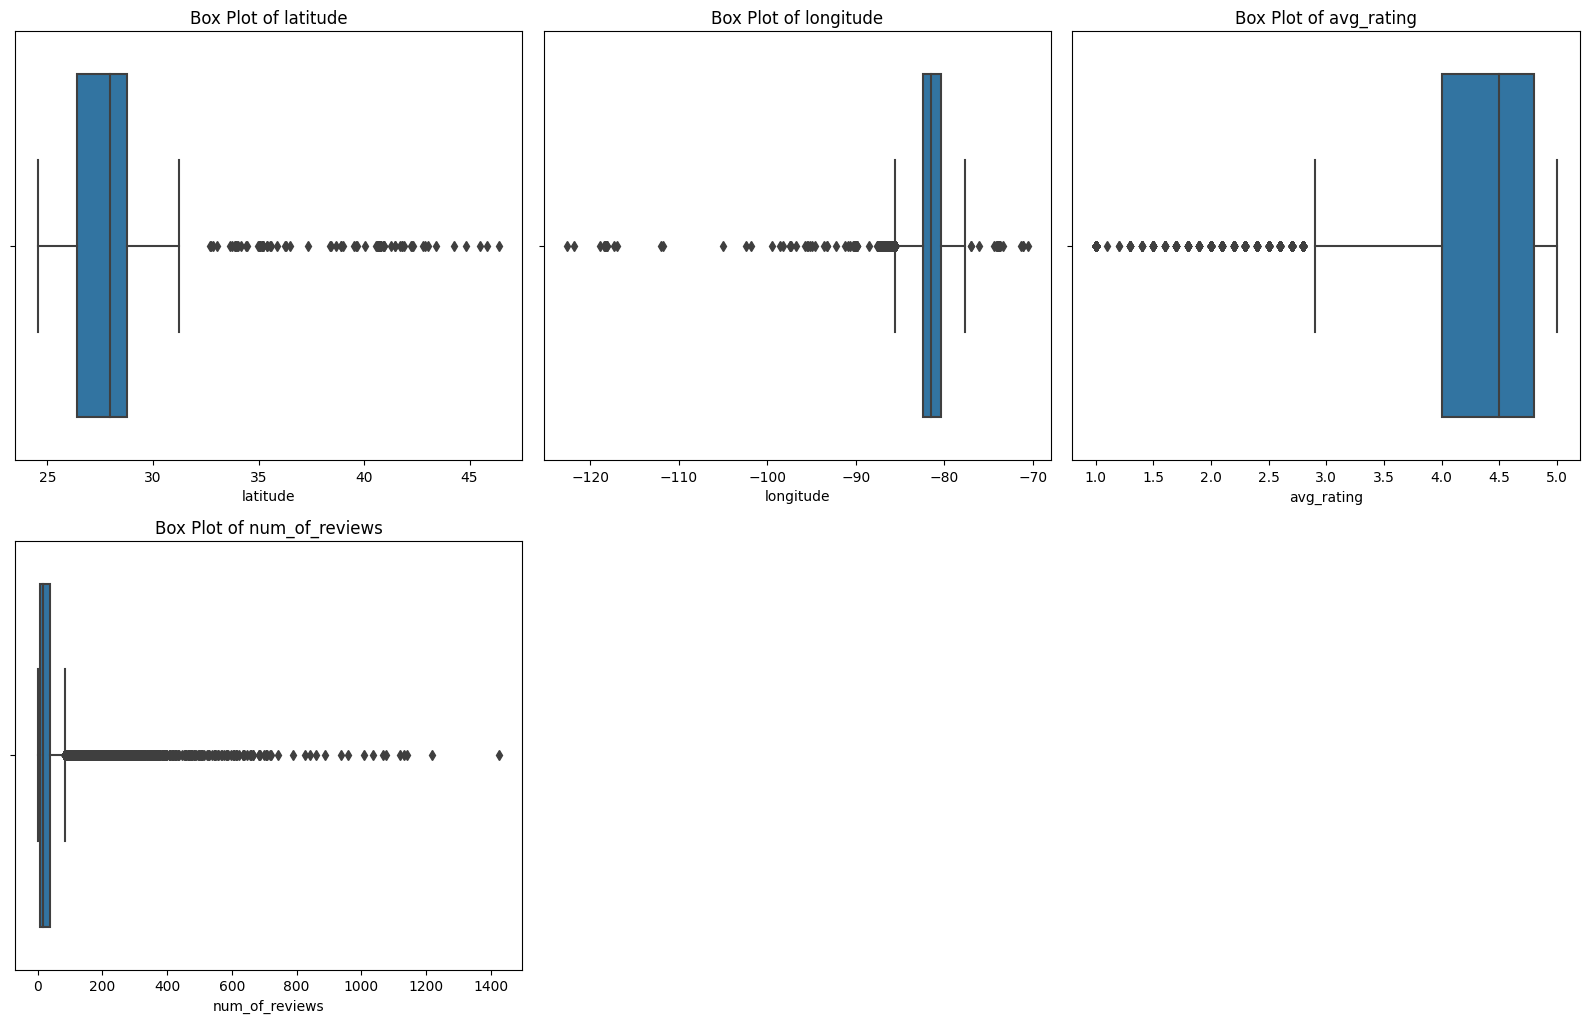

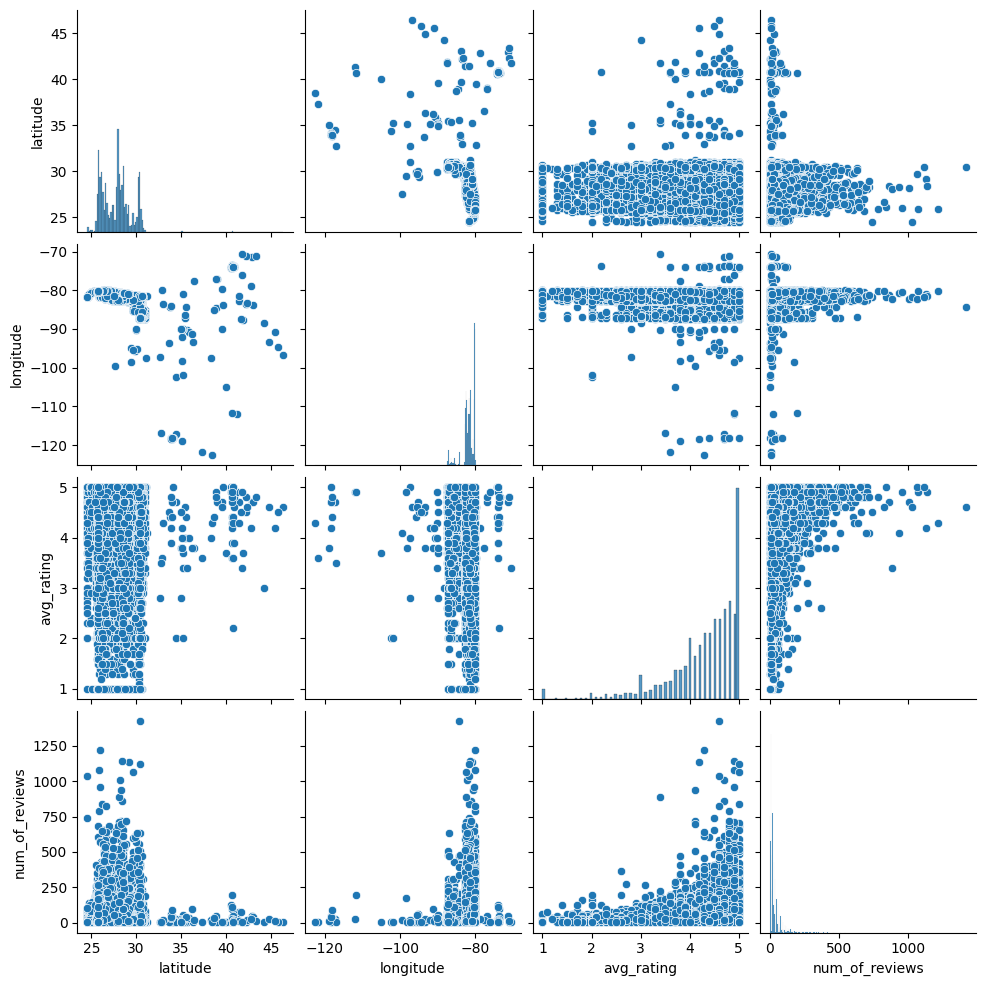

In [ ]:
numerical_columns = ['latitude'	,'longitude','avg_rating','num_of_reviews']

# Create subplots for each numerical column
fig = plt.figure(figsize=(16, 15))
for i, column in enumerate(numerical_columns):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(x=metdat_sitios_fl[column], ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

# Create scatter plots for pairwise combinations of numerical columns
sns.pairplot(metdat_sitios_fl[numerical_columns])
plt.show()

# 7. Las categorias que resaltan mas en google maps son Salon, Barber, Auto Repair, Nail Salon, Beauty Salon y otros en la muestra tomada de acuerdo a wordcloud.

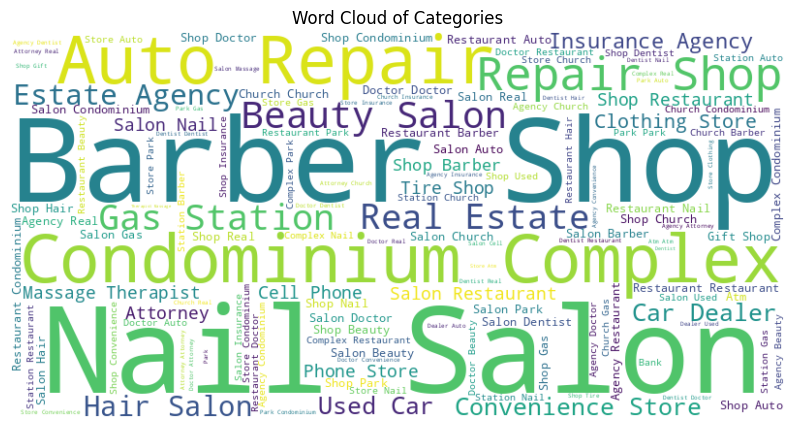

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

metdat_sitios_fl['category'] = metdat_sitios_fl['category'].str.title()  # Apply .str.title() to the 'category' Series
text = ' '.join(metdat_sitios_fl['category'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()